In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

https://sites.google.com/site/mexicanmillionmodels/

You need to obtain the access code by registering to the Google group: https://groups.google.com/forum/#!forum/3mdb_group

Once you have them, you can store them in Environment Variables, for example from your .cshrc or .bashrc configuration file.

In [2]:
user = os.environ['MdB_USER']
host = os.environ['MdB_HOST']
passwd = os.environ['MdB_PASSWD']
db = os.environ['MdB_DB_17']
port = '3306'

In [3]:
request = """SELECT 
O__3_500684A as O3,
N__2_658345A  as N2,
H__1_486133A as Hb,
H__1_656281A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac
FROM tab_17 
WHERE ref like 'BOND' 
"""

sqlEngine = create_engine(f'mysql+pymysql://{user}:{passwd}@{host}:{port}/{db}')

with sqlEngine.connect() as db_con:
    res = pd.read_sql(request, con=db_con)


In [4]:
print(len(res))

113420


In [5]:
res[0:10]

,O3,N2,Hb,Ha,O,N,logU_mean,Hbfrac
0,1.133245e+40,8.190884e+37,2.227510e+39,6.179991e+39,-3.8,-4.8,-0.584526,1.000000
1,5.459546e+38,6.399248e+34,2.065143e+38,5.468309e+38,-3.8,-4.8,0.222408,0.092711
2,1.294498e+39,3.032583e+35,4.091510e+38,1.116123e+39,-3.8,-4.8,-0.020986,0.183681
3,2.151646e+39,7.797362e+35,6.211238e+38,1.709074e+39,-3.8,-4.8,-0.162759,0.278842
4,3.137765e+39,1.603918e+36,8.498217e+38,2.345477e+39,-3.8,-4.8,-0.266371,0.381512
5,4.118975e+39,2.740648e+36,1.063334e+39,2.937536e+39,-3.8,-4.8,-0.339450,0.477364
6,5.272358e+39,4.527014e+36,1.294615e+39,3.577168e+39,-3.8,-4.8,-0.403485,0.581194
7,6.713601e+39,7.576592e+36,1.551308e+39,4.285696e+39,-3.8,-4.8,-0.462892,0.696431
8,8.083103e+39,1.164395e+37,1.762021e+39,4.866072e+39,-3.8,-4.8,-0.505558,0.791027
9,9.893233e+39,2.069538e+37,1.996603e+39,5.510703e+39,-3.8,-4.8,-0.548750,0.896338


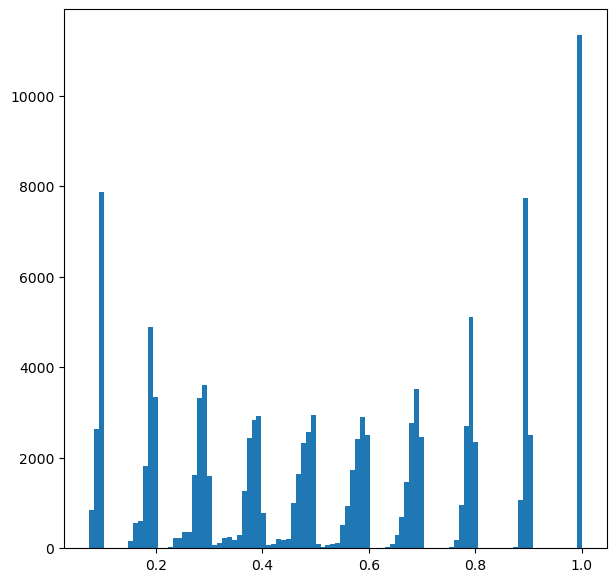

In [6]:
f, ax = plt.subplots(figsize=(7,7))
ax.hist(res['Hbfrac'], bins=100);

In [7]:
mask = res['Hbfrac'] > 0.7
res2 = res[mask]
print(len(res2))

34026


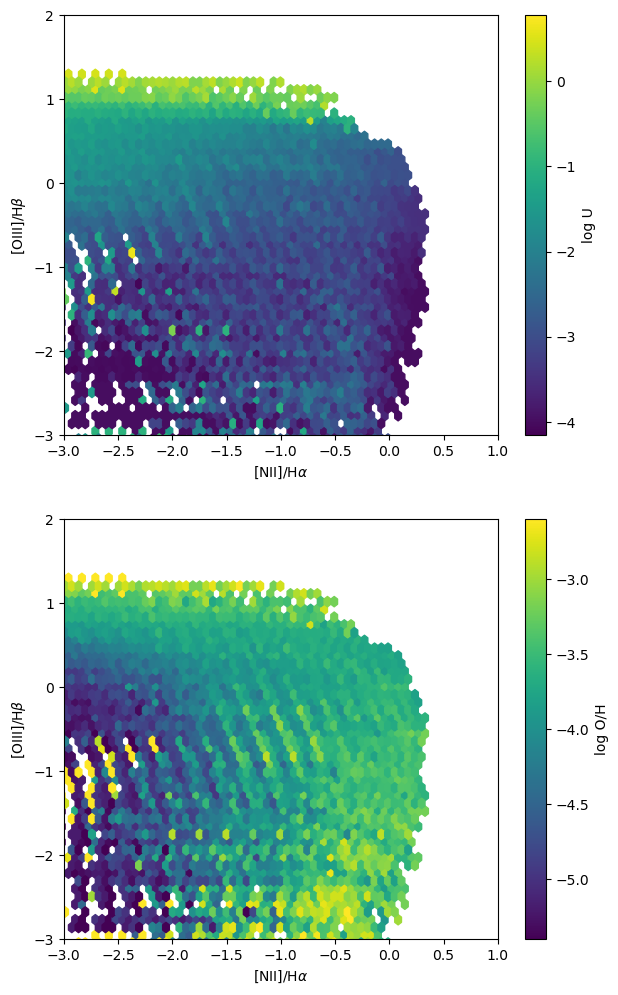

In [8]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(7,12))
cax1 = ax1.hexbin(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           C=res2['logU_mean'])
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('log U')
cax2 = ax2.hexbin(np.log10(res2['N2']/res2['Ha']), 
           np.log10(res2['O3']/res2['Hb']), 
           C=res2['O'])
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('log O/H')
for ax in (ax1, ax2):
    ax.set_xlabel(r'[NII]/H$\alpha$')
    ax.set_ylabel(r'[OIII]/H$\beta$')
    ax.set_xlim((-3,1))
    ax.set_ylim((-3,2))

## 2nd example

In [9]:
request = """SELECT 
HE_2_468564A as He2, 
BLND_372700A as O2, 
O__3_500684A as O3,
BLND_436300A as O3a,
O_3R_436300A as O3ar,
N__2_658345A  as N2,
O__1_630030A  as O1, 
O__1_631679M as O1IR,
O__3_883323M as O3IR,
(S__2_671644A +  S__2_673082A ) as S2,
H__1_486133A as Hb,
H__1_656281A as Ha,
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac,
T_HYDROGEN_vol_1 as Te, 
SUBSTRING(com3, 6) as age,
nH_mean as nH
FROM tab_17, teion_17 
WHERE tab_17.N = teion_17.N AND tab_17.ref like 'BOND' AND hbfrac > 0.8 
"""

sqlEngine = create_engine(f'mysql+pymysql://{user}:{passwd}@{host}:{port}/{db}')

with sqlEngine.connect() as db_con:
    res4 = pd.read_sql(request, con=db_con)

In [10]:
# res.age is a string, tranform it to float:
res4 = res4.apply(pd.to_numeric, errors='ignore')

In [11]:
print(len(res4))

22685


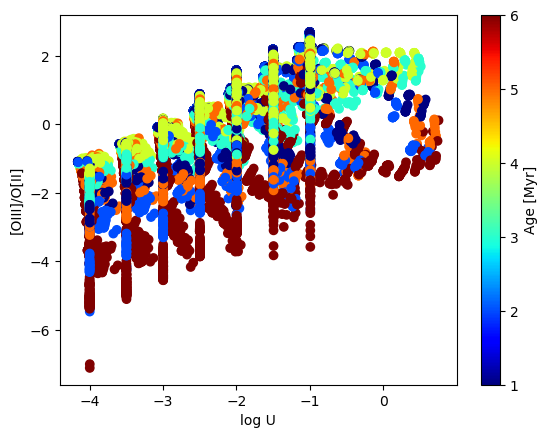

In [12]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O3']/res4['O2']),
          c=res4['age']/1e6, edgecolor=None,
          cmap='jet');
ax.set_xlabel('log U')
ax.set_ylabel('[OIII]/O[II]')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

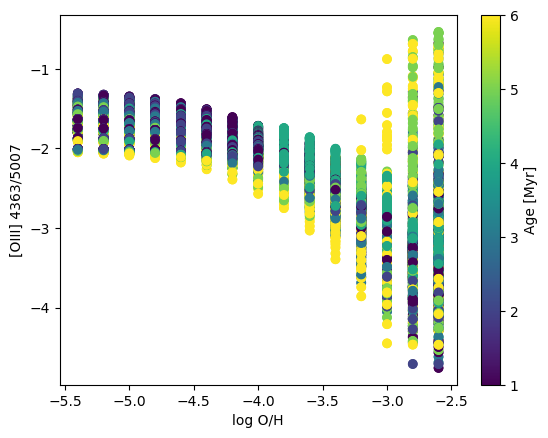

In [13]:
f, ax = plt.subplots()
cax = ax.scatter(res4['O'], 
           np.log10(res4['O3a']/res4['O3']),
          c=res4['age']/1e6, edgecolor=None);
ax.set_xlabel('log O/H')
ax.set_ylabel('[OIII] 4363/5007')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')

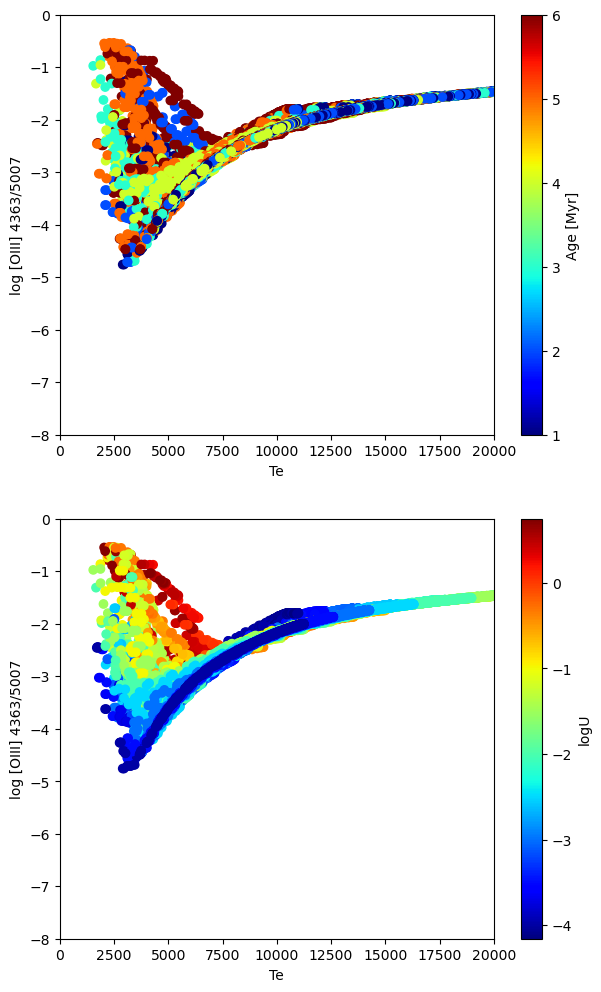

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(7,12))
cax1 = ax1.scatter(res4['Te'], 
           np.log10((res4['O3a'])/res4['O3']),
          c=res4['age']/1e6, edgecolor=None, cmap='jet');
ax1.set_xlabel('Te')
ax1.set_ylabel('log [OIII] 4363/5007')
cb1 = plt.colorbar(cax1, ax=ax1)
cb1.set_label('Age [Myr]')
ax1.set_xlim((0, 20000))
ax1.set_ylim((-8, 0))
cax2 = ax2.scatter(res4['Te'], 
           np.log10((res4['O3a']-res4['O3ar'])/res4['O3']),
          c=res4['logU_mean'], edgecolor=None, cmap='jet');
ax2.set_xlabel('Te')
ax2.set_ylabel('log [OIII] 4363/5007')
cb2 = plt.colorbar(cax2, ax=ax2)
cb2.set_label('logU')
ax2.set_xlim((0, 20000))
ax2.set_ylim((-8, 0));

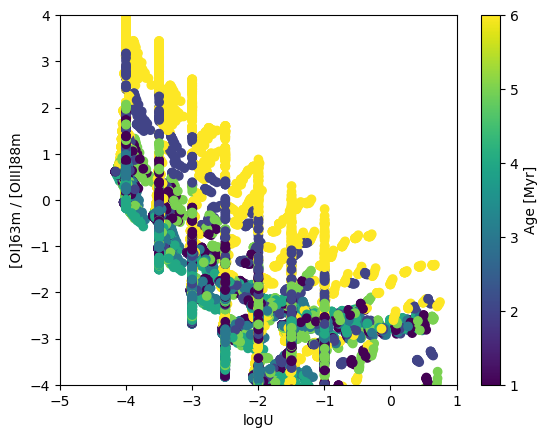

In [15]:
f, ax = plt.subplots()
cax = ax.scatter(res4['logU_mean'], 
           np.log10(res4['O1IR']/res4['O3IR']),
          c=res4['age']/1e6, edgecolor=None);
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

1512


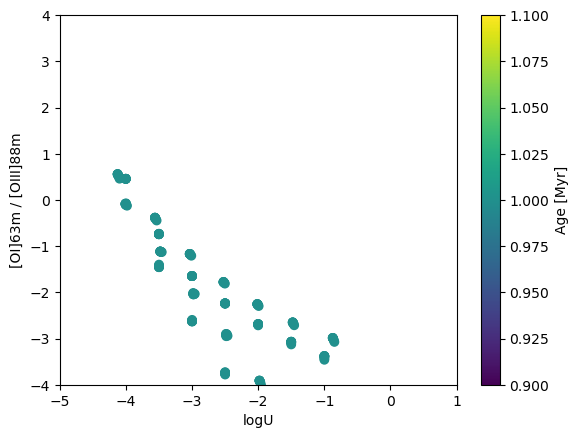

In [16]:
# Let's restrict the age and the abundance of the models
mask_age = res4['age'] == 1e6
mask_ab = res4['O'] == -4
print(mask_ab.sum())
mask = mask_age & mask_ab
res4b = res4[mask]
f, ax = plt.subplots()
cax = ax.scatter(res4b['logU_mean'], 
           np.log10(res4b['O1IR']/res4b['O3IR']),
          c=res4b['age']/1e6, edgecolor=None);
ax.set_xlabel('logU')
ax.set_ylabel('[OI]63m / [OIII]88m')
cb = plt.colorbar(cax)
cb.set_label('Age [Myr]')
ax.set_xlim((-5, 1))
ax.set_ylim((-4, 4));

## Other example

#### Using the PNe_2014 project to explore the relation between the O++ and N+ temperatures

In [39]:
request = """SELECT 
OXYGEN as O, 
T_OXYGEN_vol_2 as TOpp, 
T_NITROGEN_vol_1 as TNp, 
logU_mean as logU 
FROM tab_17, teion_17 
WHERE tab_17.N = teion_17.N AND tab_17.ref like "PNe_2020" AND com6 = 1 AND hbfrac > 0.7"""

with sqlEngine.connect() as db_con:
    res3 = pd.read_sql(request, con=db_con)

In [40]:
print(len(res3))

76356


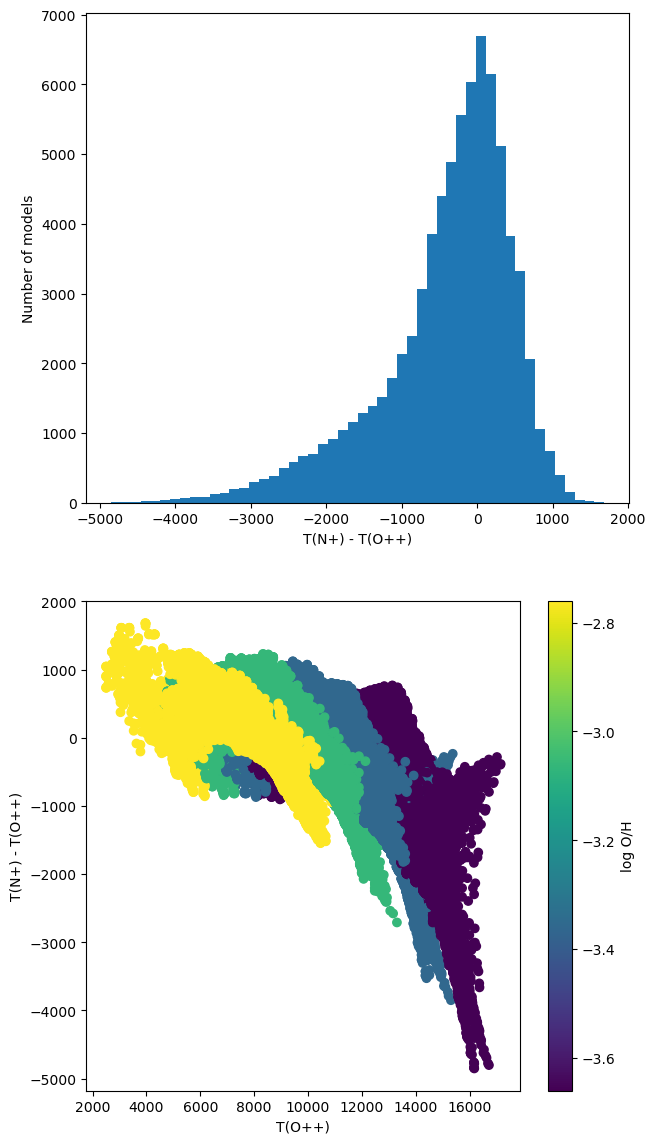

In [41]:
f, (ax2, ax1) = plt.subplots(2,1, figsize=(7,14))
cax1=ax1.scatter(res3['TOpp'], res3['TNp']-res3['TOpp'], c=res3['O'], 
                 edgecolor=None) 
cax2=ax2.hist(res3['TNp']-res3['TOpp'], bins=50)
ax1.set_xlabel('T(O++)')
ax1.set_ylabel('T(N+) - T(O++)')
ax2.set_xlabel('T(N+) - T(O++)')
ax2.set_ylabel('Number of models')
cb1 = plt.colorbar(cax1, ax=ax1);
cb1.set_label('log O/H')